<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Python for Data Analysis II
                    <br><br>
                    <em> Daniel Sierra Ramos </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# **S05: EXERCISES**

## Exercise 1

Let's $x$ be a data vector containing a set of N houses with some information relative to them: its area (in sq. feet).

Also let's $y$ be a vector of size N with the price relative to each house in $x$.

If we represent the total area of each house versus the price, we see that there is a linear trend. The bigger the house, the more expensive it is. Given this intuition, we want to build a model to estimate the price of a new house give its area.

To achieve this goal we're going to build a linear regression model from scratch using bare matrix multiplication operations. A linear regression model it's built with the following formula:
$$y=wX^T$$

where $X$ is the data matrix, $y$ is the price vector and $w$ contains the weights of the linear regression model. Given this, we know $x$ and $y$ so we must calculate $w$ given the following formula.

$$w = (X^TX)^{-1}X^Ty$$

Follow this instructions:
 1. Load both `x` and `y` from _data/x1d.npy_ and _data/y.npy_ using the `numpy.load` function
 1. Use the function `plot_data()` to represent data in a scatter plot
 1. Calculate the weights for the linear regression
     1. Add a bias term to `x` with the provided function `add_bias`. Store the result in `X` (upper)
     1. Calculate `w` using the formula $w = (X^TX)^{-1}X^Ty$
 1. Use the function `plot_data_w_model()` to represent data and the trained linear regression model
 1. Create a new function called `guess_price` that, given an area (in sq. ft.) it returns the estimated price. What price would have a house with 13478 sq. feet.

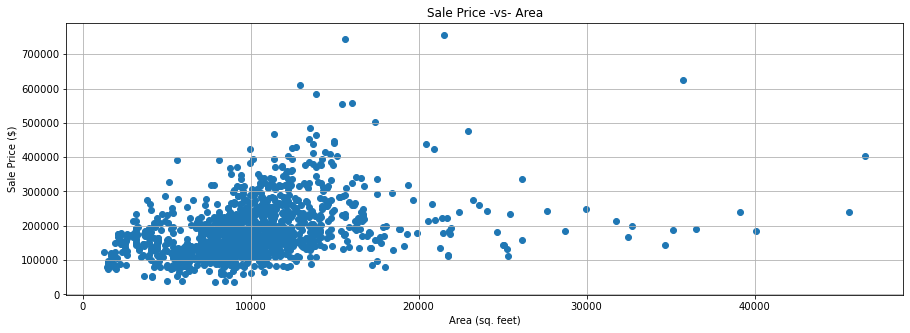

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
    f,ax = plt.subplots(figsize=(15,5), sharey=True)
    ax.scatter(x=x, y=y)
    ax.set_title("Sale Price -vs- Area")
    ax.set_xlabel("Area (sq. feet)")
    ax.set_ylabel("Sale Price ($)")
    ax.grid()

def plot_data_w_model(X, y, w):
    y_new = w.dot(X.T)
    f,ax = plt.subplots(ncols=2, figsize=(20,5), sharey=True)
    ax[0].scatter(x=X[:,1], y=y)
    ax[1].scatter(x=X[:,1], y=y)
    ax[1].plot(X[:,1], y_new, c="orange", lw=4)
    ax[0].set_title("Sale Price -vs- Area")
    ax[1].set_title("Estimated LR Model")
    ax[0].set_xlabel("Area (sq. feet)")
    ax[1].set_xlabel("Area (sq. feet)")
    ax[0].set_ylabel("Sale Price ($)")
    ax[0].grid(); ax[1].grid()
    
def add_bias(X):
    return np.c_[np.ones(len(X)),X]

x=np.load("data/x1d.npy")
y=np.load("data/y.npy")
plot_data(x,y)

In [12]:
X=add_bias(x)
w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

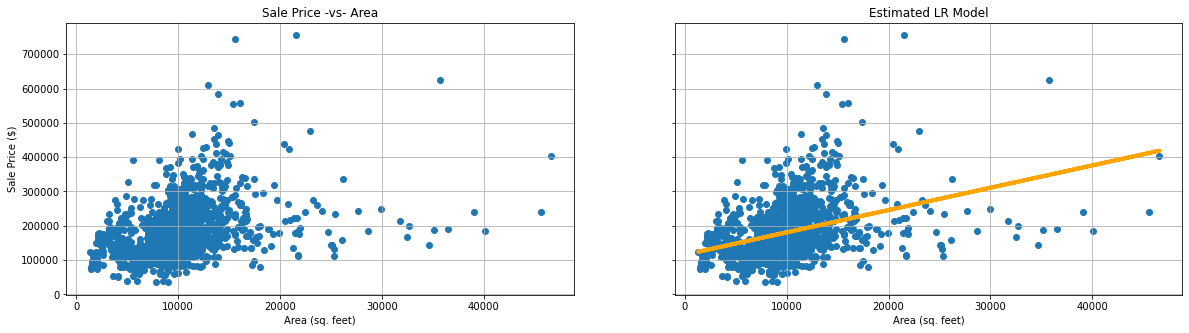

In [13]:
w_a=X.T.dot(X)
w_b=np.linalg.inv(w_a)
w_c=w_b.dot(X.T)
w_b=w_c.dot(y)

plot_data_w_model(X,y,w)

In [15]:
def guess_price(area):
    price=w.dot(np.array([1.,area]))
    print(f"area {area} cost {price}")
    
guess_price(1348)

area 1348 cost 124695.4580543127
